Results:  <br> 
A. For KNN 
  - Accuracy decreased when Linear Interpolation was applied instead of simple imputation. The spline interpolation with order 3 just as good as the simple imputer. 
  - Spline Interpolation with order 3 gets better results than Linear Interpolation.
 
B. For SVM 
   -  Accuracy Increased when using Linear interpolation instead of simple imputation. Number of False Negatives decreased.  
   - There was no difference in the confusion matrix when Spline interpolation of order 3 was used instead of the linear interpolation. 
    

In [1]:
%run imports-func.ipynb

In [2]:
dataset = pd.read_csv('heart.csv')
X = dataset.drop(columns = ['target'], axis = 1)
y = dataset['target']

In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Just the imputation without feature selection to compare the performance. 

In [5]:
list_to_impute = ['trestbps', 'chol','slope',  'thal']
# according to the documentation 
# trestbps is the resting blood pressure so it should not be 0. 
# cholestrol also should not be 0 
#  slope 1,2,3 are valid values because 2 is flat. 0 slope doesn't mean anything. 
# thal should not be 0 because it has values 1,2,3 as valid values in 3 classes. 


In [6]:
imputer = SimpleImputer(missing_values = 0, strategy = 'mean',verbose = 2)

imputer = imputer.fit(X[list_to_impute])
X[list_to_impute] = imputer.transform(X[list_to_impute])

In [7]:
(X[list_to_impute] == 0).any()

trestbps    False
chol        False
slope       False
thal        False
dtype: bool

In [8]:

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [9]:


X_2 = dataset.drop(['target'],axis = 1)
X_2[X_2[list_to_impute] == 0] = np.nan
X_2 = X_2.interpolate(method ='linear', limit_direction = 'both', limit = 10)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, random_state=7)
scaler.fit(X_train_2)
X_train_2 = scaler.transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)




X_3 = dataset.drop(['target'],axis = 1)
X_3[X_3[list_to_impute] == 0] = np.nan
X_3 = X_3.interpolate(method = 'spline', order = 3).bfill()

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, random_state=7)
scaler.fit(X_train_3)
X_train_3 = scaler.transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)


                                           Simple Imputer                                           


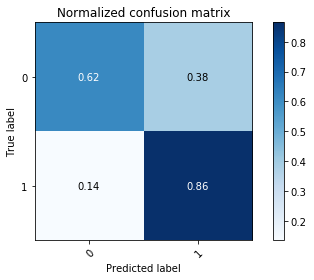

----------------------------------------------------------------------------------------------------
                                        Linear Interpolation                                        


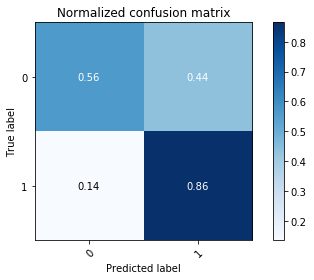

----------------------------------------------------------------------------------------------------
                                 Spline Interpolation with Order 3                                  


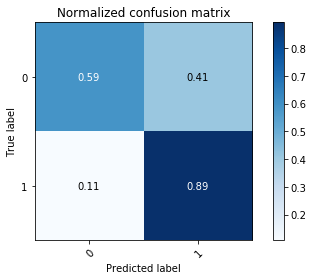

In [21]:
#knn
# knn on simple imputer 


print ('{:^100}'.format('Simple Imputer'))
run_knn(X_train,y_train, X_test, y_test)
plt.show()
print ('-'*100)
# knn on linear interpolation
print ('{:^100}'.format('Linear Interpolation'))
run_knn(X_train_2,y_train_2, X_test_2, y_test_2)
plt.show()
# knn on spline interpolation 
print ('-'*100)
print ('{:^100}'.format('Spline Interpolation with Order 3'))
run_knn(X_train_3,y_train_3, X_test_3, y_test_3)

                                           Simple Imputer                                           


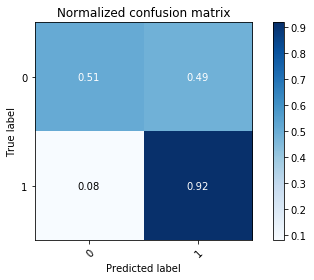

----------------------------------------------------------------------------------------------------
                                        Linear Interpolation                                        


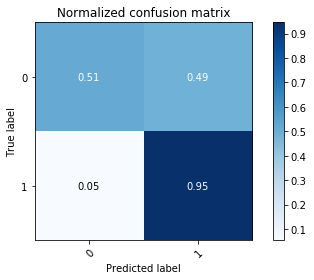

----------------------------------------------------------------------------------------------------
                                 Spline Interpolation with Order 3                                  


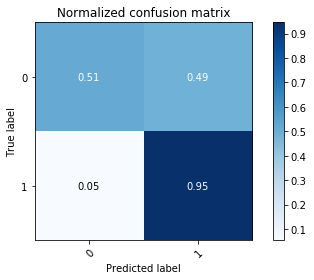

In [37]:
#SVM
# SVM on simple imputer 

print ('{:^100}'.format('Simple Imputer'))
run_svm(X_train,y_train, X_test, y_test)
print ('-'*100)
# SVM on linear interpolation
print ('{:^100}'.format('Linear Interpolation'))
run_svm(X_train_2,y_train_2, X_test_2, y_test_2)
# SVM on spline interpolation 
print ('-'*100)
print ('{:^100}'.format('Spline Interpolation with Order 3'))
run_svm(X_train_3,y_train_3, X_test_3, y_test_3)

plt.show()

In [12]:
# Regression on simple imputer
print ('{:^100}'.format('Simple Imputer'))
run_logistic(X_train, y_train, X_test, y_test)
print ('-'*100)
# Regression on data with linear interpolation
print ('{:^100}'.format('Linear Interpolation'))
run_logistic(X_train_2,y_train_2, X_test_2, y_test_2)
print ('-'*100)
# Regression on data with spline interpolation
print ('{:^100}'.format('Spline Interpolation with Order 3'))
run_logistic(X_train_3,y_train_3, X_test_3, y_test_3)

                                           Simple Imputer                                           
Score for training set 0.8943
Score for test set 0.75
----------------------------------------------------------------------------------------------------
                                        Linear Interpolation                                        
Score for training set 0.8987
Score for test set 0.7368
----------------------------------------------------------------------------------------------------
                                 Spline Interpolation with Order 3                                  
Score for training set 0.8987
Score for test set 0.75


In [13]:
# Regression on simple imputer
print ('{:^100}'.format('Simple Imputer'))
run_linear(X_train, y_train, X_test, y_test)
print ('-'*100)
# Regression on data with linear interpolation
print ('{:^100}'.format('Linear Interpolation'))
run_linear(X_train_2,y_train_2, X_test_2, y_test_2)
print ('-'*100)
# Regression on data with spline interpolation
print ('{:^100}'.format('Spline Interpolation with Order 3'))
run_linear(X_train_3,y_train_3, X_test_3, y_test_3)

                                           Simple Imputer                                           
Coefficients: 
 [-0.   -0.09  0.13 -0.05 -0.01  0.02  0.01  0.05 -0.08 -0.09  0.06 -0.09
 -0.08]
Mean squared error: 0.17
Variance score: 0.32
----------------------------------------------------------------------------------------------------
                                        Linear Interpolation                                        
Coefficients: 
 [ 0.   -0.09  0.12 -0.05 -0.01  0.01  0.    0.05 -0.08 -0.09  0.07 -0.09
 -0.08]
Mean squared error: 0.17
Variance score: 0.33
----------------------------------------------------------------------------------------------------
                                 Spline Interpolation with Order 3                                  
Coefficients: 
 [-0.   -0.09  0.13 -0.05 -0.01  0.02  0.01  0.05 -0.08 -0.09  0.07 -0.09
 -0.08]
Mean squared error: 0.17
Variance score: 0.33
